# Seattle Library - Datenanalyse


Datasets:

* [Checkouts by Title](https://dev.socrata.com/foundry/data.seattle.gov/tmmm-ytt6)
* [Library Collection Inventory](https://data.seattle.gov/Community/Library-Collection-Inventory/6vkj-f5xf)

API-dokumenation:
* Paging through Data https://dev.socrata.com/docs/queries/
* Queries using SODA https://dev.socrata.com/docs/paging.html

In [1]:
import urllib.request
import pandas as pd

## Checkout-Daten über die API beziehen und als CSV-Datei speichern

In [2]:
url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2018&$limit=10000"
checkout_file = "checkout.csv"
urllib.request.urlretrieve(url, checkout_file)

('checkout.csv', <http.client.HTTPMessage at 0x1b9608571d0>)

## In einen DataFrame laden und analysieren

In [3]:
checkouts_df = pd.read_csv(checkout_file)

In [4]:
checkouts_df

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,isbn,creator,subjects,publisher,publicationyear
0,Digital,OverDrive,EBOOK,2018,1,22,Enemy of the State,NaN,Vince Flynn,"Fiction, Literature, Thriller","Simon & Schuster, Inc.",2017
1,Digital,Hoopla,TELEVISION,2018,1,1,Newspaper Mom / Cucumber in Rio / Donut Raffle,NaN,NaN,Children's,DHX Media,NaN
2,Physical,Horizon,SOUNDDISC,2018,1,1,Mono / the Mavericks.,NaN,Mavericks (Musical group),Country music 2011 2020,"Valory,",[2015]
3,Digital,OverDrive,EBOOK,2018,1,2,Anna Karenina,NaN,Leo Tolstoy,"Classic Literature, Fiction, Literature","Penguin Group (USA), Inc.",2009
4,Digital,OverDrive,EBOOK,2018,1,1,"Dragon: Vlad Series, Book 8",NaN,Steven Brust,"Fantasy, Fiction",Macmillan Publishers,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Digital,OverDrive,EBOOK,2018,1,1,"Immortal: Fallen Angels Series, Book 6",NaN,J.R. Ward,"Fantasy, Fiction, Romance","Penguin Group (USA), Inc.",2014
9996,Digital,OverDrive,EBOOK,2018,1,1,The Price of Silence,NaN,Kate Wilhelm,"Fiction, Suspense, Thriller","Harlequin Enterprises, Ltd.",2011
9997,Digital,Freegal,SONG,2018,1,1,Desert Hideaway,NaN,NaN,NaN,NaN,NaN
9998,Physical,Horizon,BOOK,2018,1,3,Waistcoats & weaponry / Gail Carriger.,NaN,"Carriger, Gail","Boarding schools Fiction, Schools Fiction, Eti...","Little, Brown and Company,",2014.


### Frage 1:
Welches sind die Top-Ten Titel aus der Datenauswahl?

***Vorgehen:** Die Top-Ten Titel werden im neuen Dataframe "checkouts_top10_df" gespeichert. Dafür wird der originale Dataframe zunächst absteigend nach Anzahl der "checkouts" sortiert. Die ersten 10 Ergebnisse des sortierten Dataframes werden in den neuen Dataframe übernommen.*

In [5]:
checkouts_top10_df = checkouts_df[["checkouts", "title", "creator", "materialtype"]].sort_values(by=["checkouts"], ascending=False).head(n=10)

In [6]:
checkouts_top10_df[["checkouts", "title", "creator"]]

,checkouts,title,creator
6638,540,In the midst of winter : a novel / Isabel Alle...,"Allende, Isabel"
9700,495,Her body and other parties : stories / Carmen ...,"Machado, Carmen Maria"
9255,354,The Economist,NaN
7785,176,Hidden figures / 20th Century Fox ; Fox 2000 P...,NaN
6084,114,George & Lizzie : a novel / Nancy Pearl.,"Pearl, Nancy"
3056,106,The Underground Railroad (Oprah's Book Club): ...,Colson Whitehead
2170,105,Ghostbusters / Columbia Pictures ; in associat...,NaN
867,95,Leonardo da Vinci / Walter Isaacson.,"Isaacson, Walter"
6855,89,Kidnap / Universal ; Aviron Pictures ; dB Pict...,NaN
6576,86,Better Homes and Gardens,NaN


### Frage 2:
Das am meisten verliehene Medium stammt von Isabell Allende - welche weiteren Medien gibt es von dieser Autorin?

***Vorgehen:** Alle Einträge, die in der Spalte "creator" den Wert "Allende, Isabel" haben, werden in einen neuen Dataframe übernommen. Anschließend wird dieser angezeigt.*

In [7]:
checkouts_allende_df = checkouts_df[checkouts_df["creator"] == "Allende, Isabel"]
checkouts_allende_df

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,isbn,creator,subjects,publisher,publicationyear
4226,Physical,Horizon,SOUNDDISC,2018,1,3,Maya's notebook : [a novel] / Isabel Allende.,NaN,"Allende, Isabel","Young women Fiction, Diaries Authorship Fictio...","Harper Audio,",2013.
5068,Physical,Horizon,BOOK,2018,1,17,The house of the spirits / Isabel Allende ; tr...,NaN,"Allende, Isabel",Domestic fiction,"Everyman's Library,",2005.
6638,Physical,Horizon,BOOK,2018,1,540,In the midst of winter : a novel / Isabel Alle...,NaN,"Allende, Isabel","College teachers Fiction, Women college teache...","Atria Books,",2017.
9189,Physical,Horizon,BOOK,2018,1,3,Ripper : a novel / Isabel Allende ; translated...,NaN,"Allende, Isabel","Crimestoppers Fiction, Teenagers Fiction, Seri...","Harper,",2014.


### Frage 3:
Aus welchen Medientypen setzen sich die Einträge zu Isabell Allende zusammen? Welche Medientypen sind in den Top 10 vertreten?

***Vorgehen:** Die beiden neu erzeugten Dataframes checkouts_allende_df und checkouts_top10_df werden als Pie-Chart dargestellt.*

<Axes: ylabel='materialtype'>

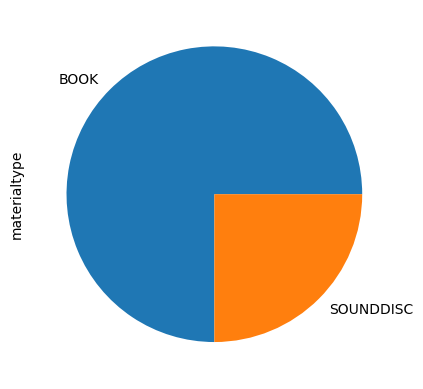

In [11]:
checkouts_allende_df["materialtype"].value_counts().plot(kind="pie")

<Axes: ylabel='materialtype'>

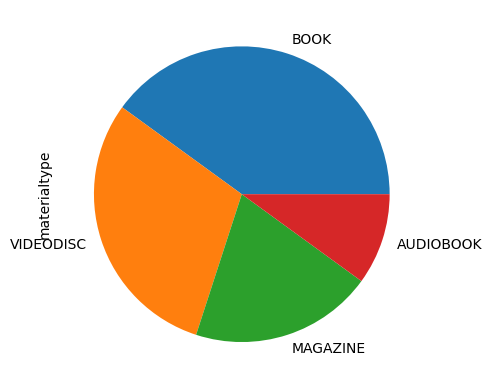

In [9]:
checkouts_top10_df["materialtype"].value_counts().plot(kind="pie")